In [1]:
import pdf2image
doc = pdf2image.convert_from_path("./pdf_files/2021-tesla-impact-report.pdf")
len(doc)

: 

: 

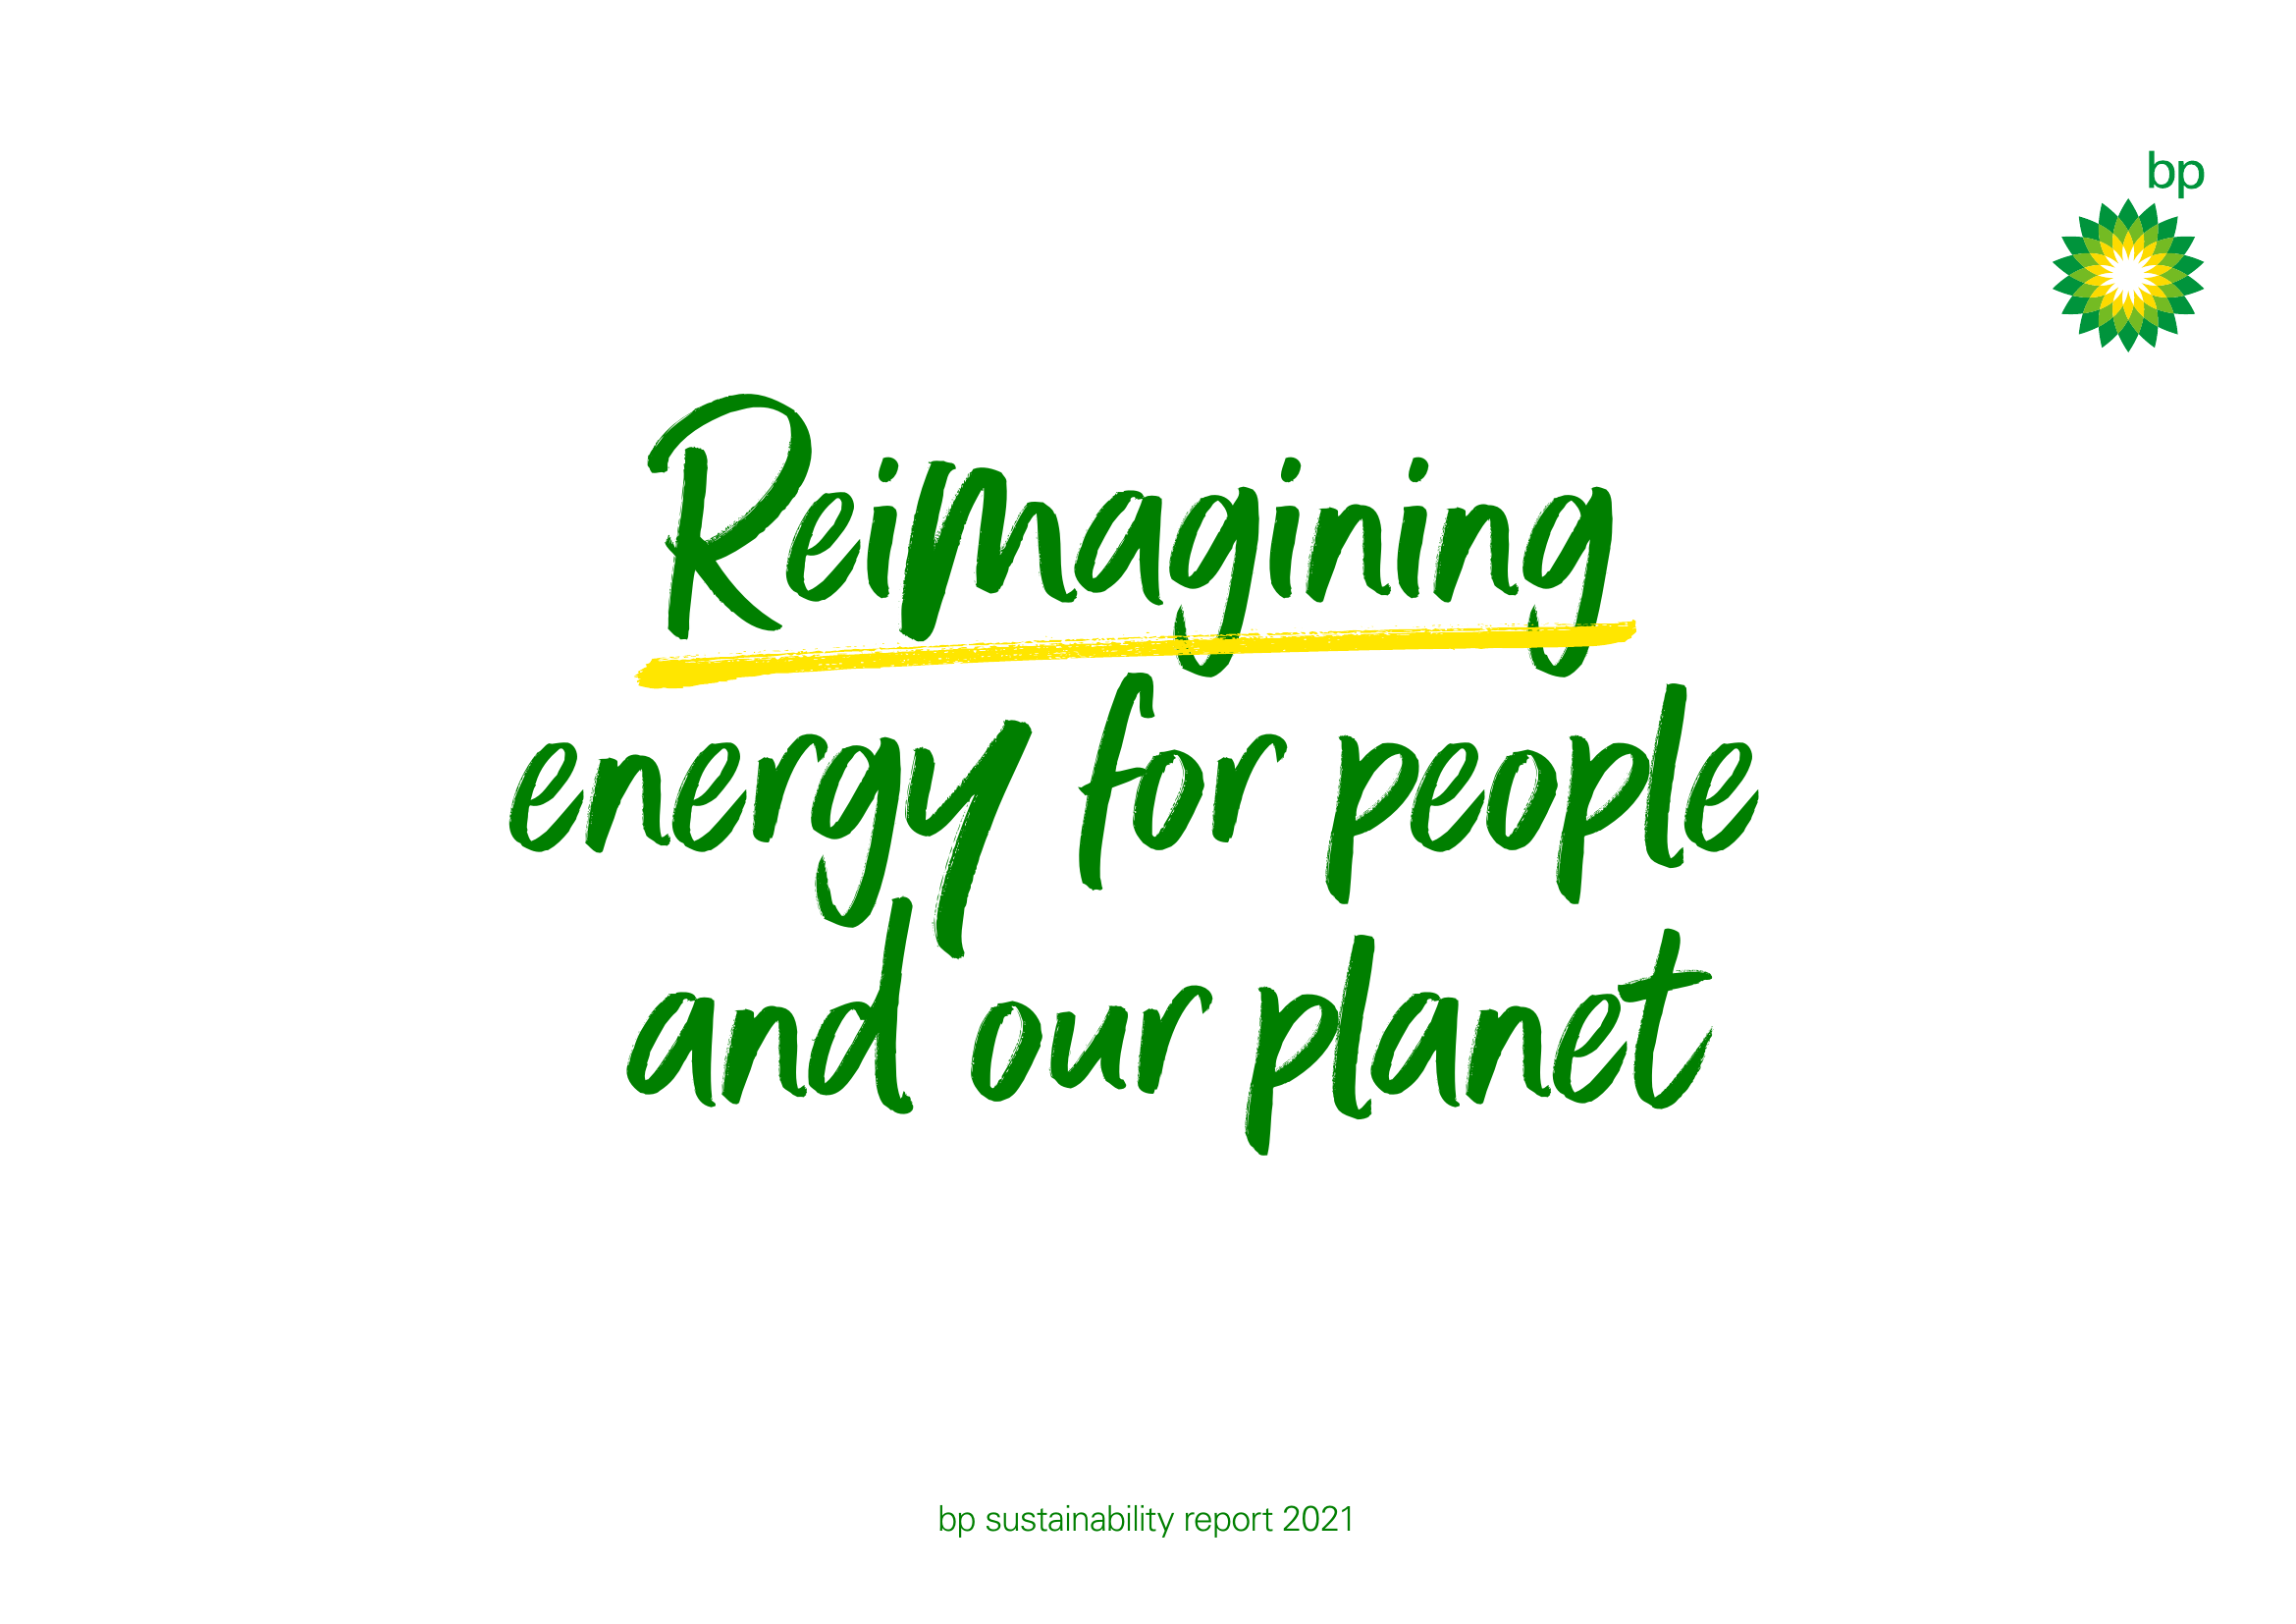

In [2]:
doc[0]

In [3]:
import layoutparser as lp
import cv2
import numpy as np
import io
import pandas as pd
import matplotlib.pyplot as plt

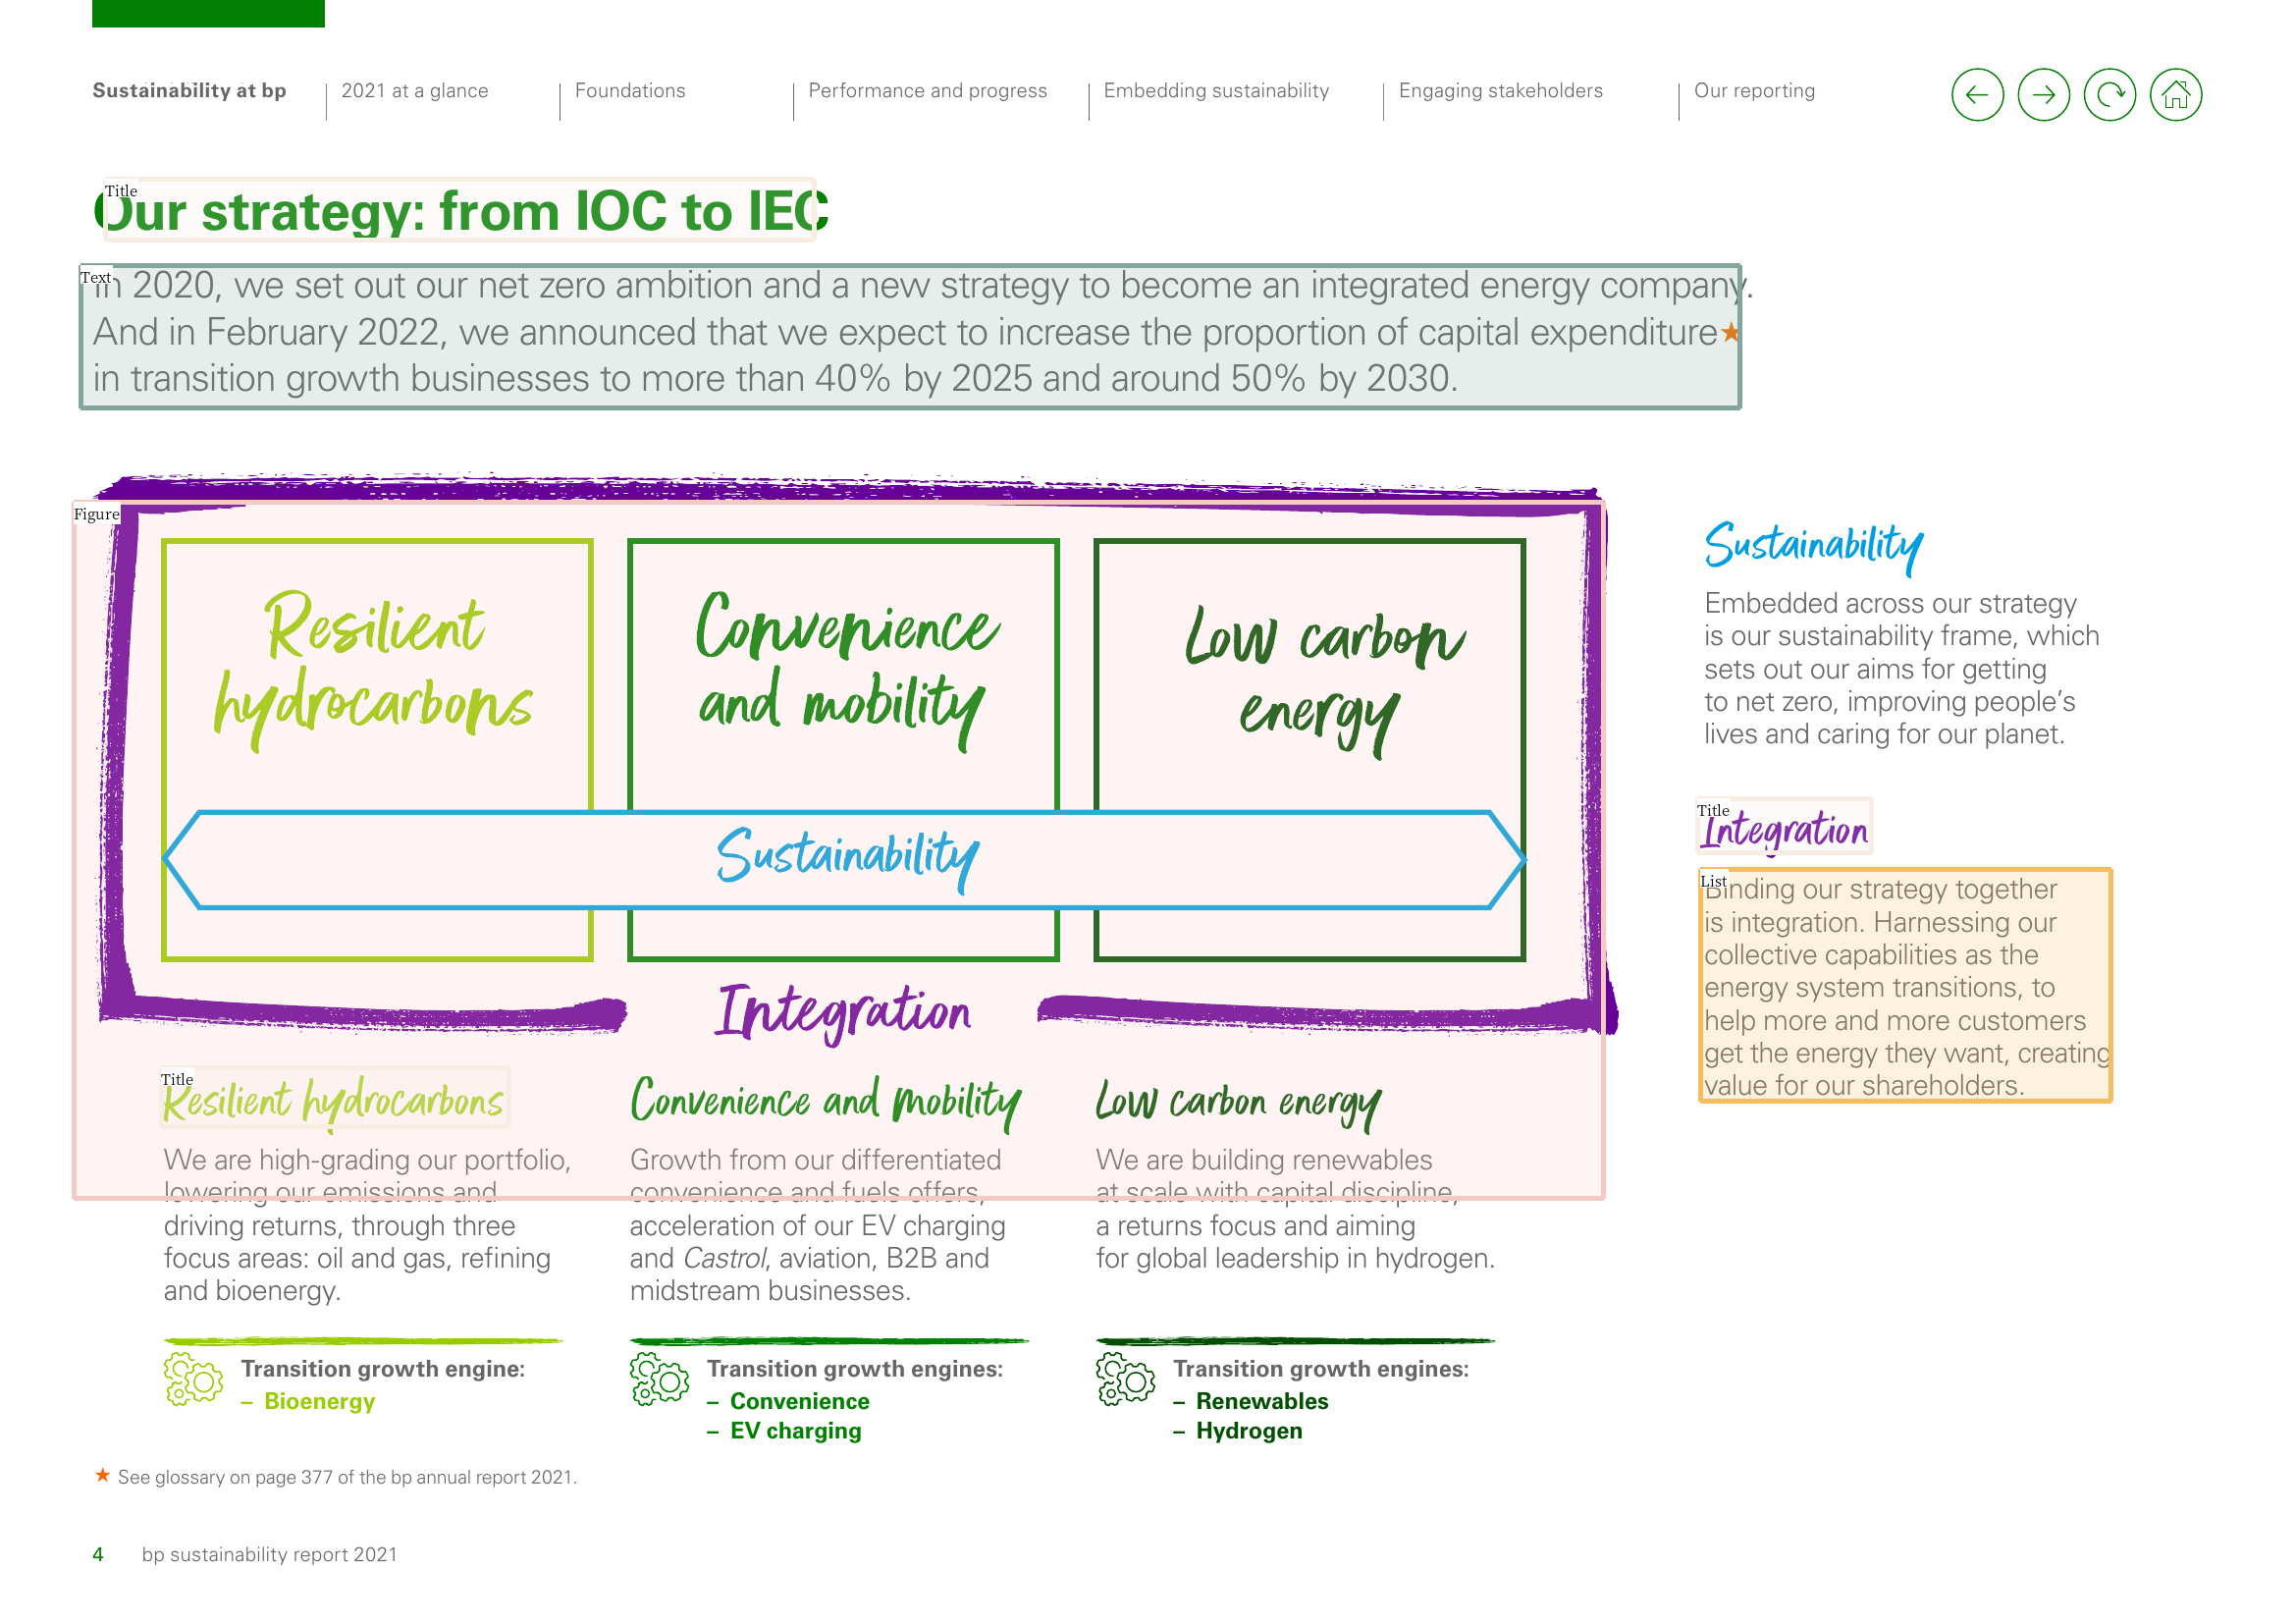

In [7]:
## load pre-trained model
model = lp.Detectron2LayoutModel(
 "lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config",
 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
 label_map={0:"Text", 1:"Title", 2:"List", 3:"Table", 4:"Figure"})
## turn img into array
i = 5
img = np.asarray(doc[i])
## predict
detected = model.detect(img)
## plot
lp.draw_box(img, detected, box_width=5, box_alpha=0.2,
         show_element_type=True)

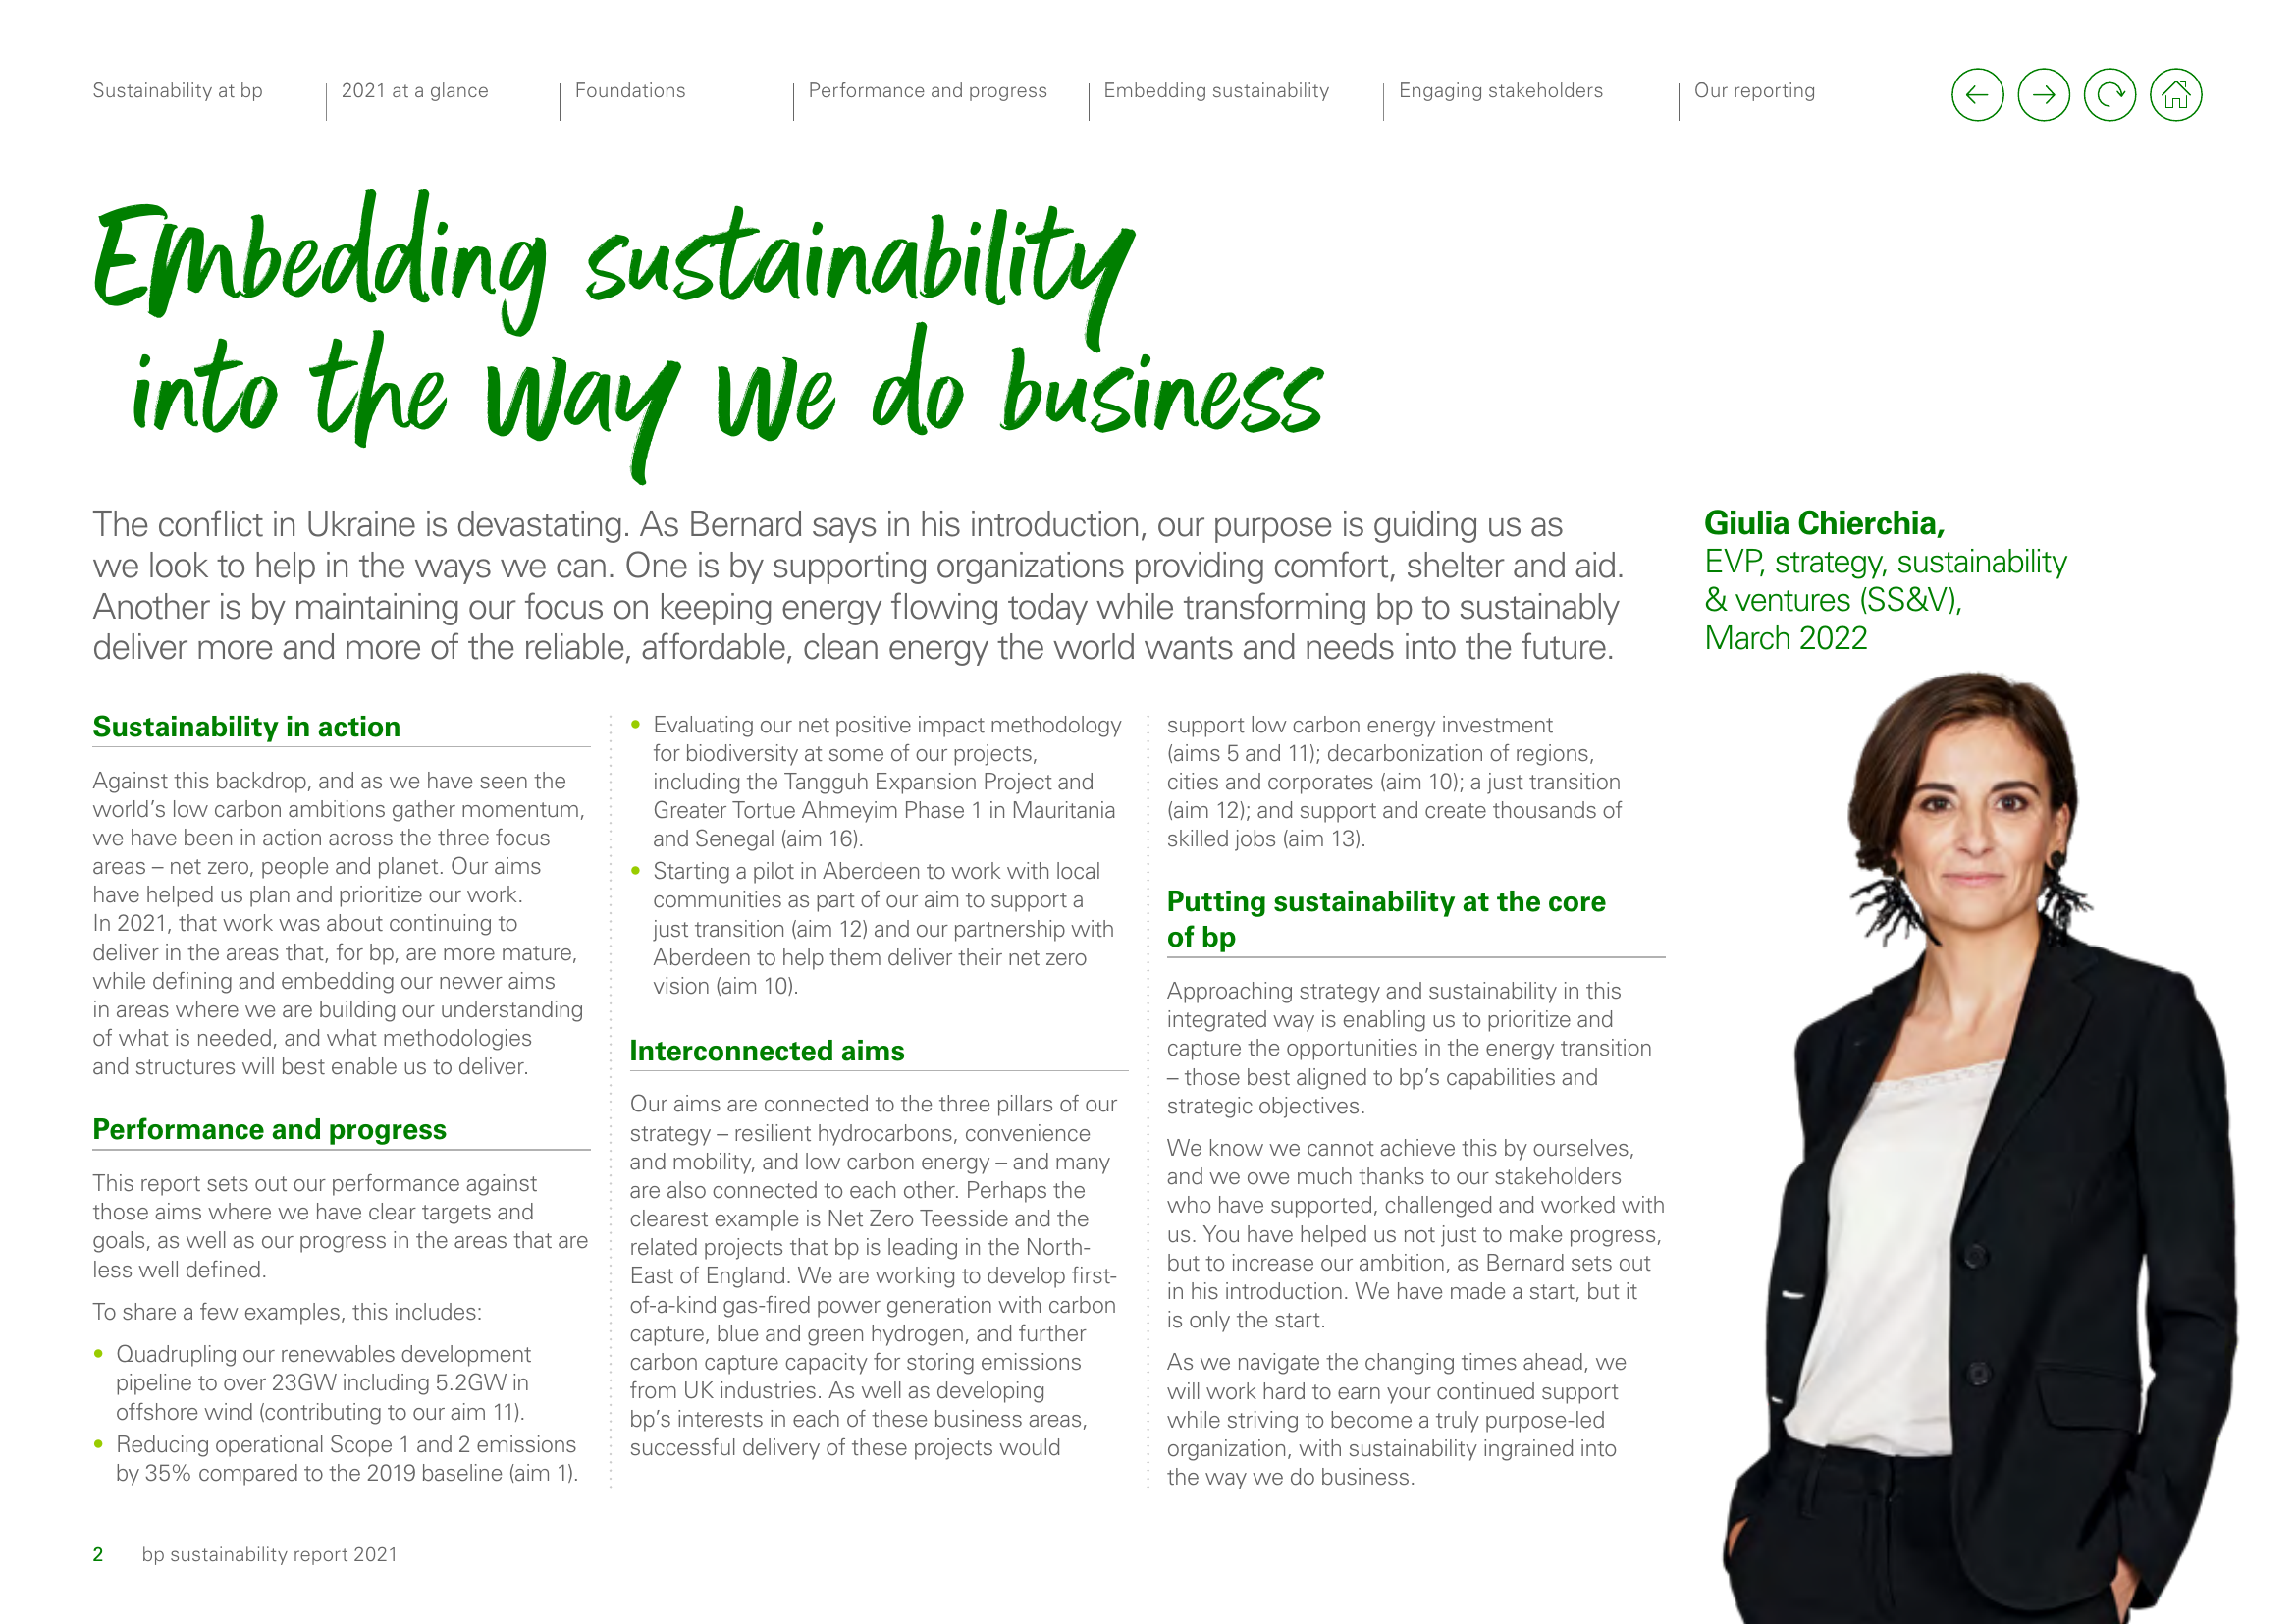

In [16]:
## load pre-trained model
model = lp.Detectron2LayoutModel(
 "lp://TableBank/faster_rcnn_R_101_FPN_3x/config",
 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
 label_map={0: "Table"})
## turn img into array
i = 3
img = np.asarray(doc[i])
## predict
detected = model.detect(img)
## plot
lp.draw_box(img, detected, box_width=5, box_alpha=0.2,
         show_element_type=True)

In [14]:
text_blocks = lp.Layout([b for b in detected if b.type=='Text'])
figure_blocks = lp.Layout([b for b in detected if b.type=='Figure'])
table_blocksd = lp.Layout([b for b in detected if b.type=="Table"])